In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
def UCB1(k, steps, runs, true_values, c):
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    optimal_arm = np.argmax(true_values,axis = 1)
    
    for i in range(runs):   
        '''
        Expected rewards of each arm. Each arm has a value and the number of times it has been pulled.
        ''' 
        exp_val = np.zeros([k,2])   
        '''
        Pull each arm once
        '''
        upper_bounds = []
        for j in range(steps):
            
            if j<k:
                '''
                Pulling each once.
                '''
                reward = np.random.normal(true_values[i][j],1)  
                
                exp_val[j][1] += 1
#                 print(reward)
                exp_val[j][0] += reward
                            
            else:
                '''
                Selecting the arm which has highest upper confidence bound
                '''
                upper_bounds = exp_val[:,0] + np.sqrt(c*np.log(j)/exp_val[:,1])
                max_arm = np.argmax(upper_bounds)
                reward = np.random.normal(true_values[i][max_arm],1)
                
                exp_val[max_arm][1] += 1
                exp_val[max_arm][0] = (exp_val[max_arm][0]*(exp_val[max_arm][1]-1)+reward)/exp_val[max_arm][1]         
#                 upper_bounds[max_arm] = exp_val[max_arm][0] + np.sqrt(c*np.log(j)/exp_val[max_arm][1]) 
                
                
                if optimal_arm[i] == max_arm:
                    opt[j]+=1

        
            avg[j] += reward
            
    avg = np.divide(avg, runs)
    opt = np.divide(opt, runs/100)
        
    return avg, opt
    
    

In [40]:
def plot_fig(avg, opt):
    
    fig1=plt.figure()
    fig2=plt.figure()

    fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
    fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])

    x = np.zeros([len(avg)])
    for i in range(1,steps+1):
        x[i-1] = i

    fig1.plot(x, avg, 'r')

    fig2.plot(x, opt, 'b')

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()

In [41]:
from pb1 import Epsilon_greedy

def compare_epsilon_ucb(true_values):
    steps = 1000
    runs = 2000
    epsilons = [0.1]
    k = 10
    mean = 0
    std_dev = 1
    c = 2
    
    avg_epsi,_ = Epsilon_greedy(k, epsilons[0], steps, runs, true_values)
    avg_ucb,_  =  UCB1(k, steps, runs, true_values, c)
    
    plt.plot(range(len(avg_epsi)), avg_epsi, 'r', label = "$\epsilon$ = " + str(epsilons[0]) )
    plt.plot(range(len(avg_ucb)), avg_ucb, 'k', label = "UCB1")
    
    plt.xlabel('Steps', fontsize = 15)
    plt.ylabel('Average reward', fontsize = 15)
    plt.title('Comparition between epsilon greedy and UCB1', fontsize = 15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(0, 1.6)


    plt.show()
    
    

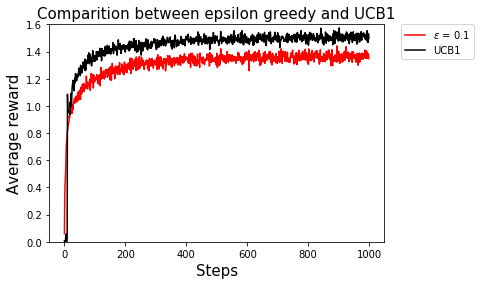

In [43]:
import math
if __name__ == '__main__':
    steps = 1000
    runs = 2000
    k = 10
    mean = 0
    std_dev = 1
    c = 2
    true_values = np.random.normal(mean, std_dev, (runs, k))

#     avg, opt = UCB1(k, steps, runs, true_values, c)
#     plot_fig(avg, opt)

    compare_epsilon_ucb(true_values)
    

In [38]:
n = np.array([[1,2,3,4],
              [9,8,7,6]])
a = np.ones([10,2])
print(a[:,0])


b = a[:,0] + np.sqrt(5/a[:,1])
print(b)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[3.23606798 3.23606798 3.23606798 3.23606798 3.23606798 3.23606798
 3.23606798 3.23606798 3.23606798 3.23606798]
